#### 데이터 - 공공데이터포털 => 대검찰청_범죄자 교육정도
#### https://www.data.go.kr/data/15085990/fileData.do
* 대검찰청_범죄자 교육정도_20171231
* 대검찰청_범죄자 교육정도_20181231
* 대검찰청_범죄자 교육정도_20191231

** 본 데이터는 범죄자의 교육정도에 따른 형법/특별법범의 통계임. (단위: 명)

### [ 연도별 교육수준에 따른 평균 범죄 수 ]

In [1]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

# 그래프 한글 깨짐 방지
import matplotlib
import platform

if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')

In [2]:
# 데이터 불러오기
df17 = pd.read_csv("../Desktop/criminal_2017.csv", encoding="cp949", index_col="범죄분류")    # 2017년도
df18 = pd.read_csv("../Desktop/criminal_2018.csv", encoding="cp949", index_col="범죄분류")    # 2018년도
df19 = pd.read_csv("../Desktop/criminal_2019.csv", encoding="cp949", index_col="범죄분류")    # 2019년도

In [3]:
# 가장 위에 있는 5개의 데이터
df17.head()

,불취학,초등학교_재중,초등학교_중퇴,초등학교_졸업,중학교_재중,중학교_중퇴,중학교_졸업,고등학교_재중,고등학교_중퇴,고등학교_졸업,전문대학_재중,전문대학_중퇴,전문대학_졸업,대학교_재중,대학교_중퇴,대학교_졸업,대학원,기타,미상
범죄분류,,,,,,,,,,,,,,,,,,,
절도,2186,58,2436,7061,6162,2900,7837,8394,5436,29285,491,565,3643,2858,2242,8483,1438,1128,14053
장물,11,0,19,86,59,60,163,245,133,1139,15,10,123,84,75,351,49,13,496
사기,377,6,645,3302,582,2174,7886,2133,5821,49884,316,864,5458,2273,4847,14267,2735,1357,118195
횡령,265,2,340,1209,176,456,1471,747,721,7697,62,110,1165,521,632,3146,659,242,16694
배임,8,0,8,92,0,28,142,0,50,1144,3,16,202,14,72,969,196,32,7093


In [4]:
# 값들의 데이터 타입
df17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 절도 to 기타특별법
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   불취학      162 non-null    int64
 1   초등학교_재중  162 non-null    int64
 2   초등학교_중퇴  162 non-null    int64
 3   초등학교_졸업  162 non-null    int64
 4   중학교_재중   162 non-null    int64
 5   중학교_중퇴   162 non-null    int64
 6   중학교_졸업   162 non-null    int64
 7   고등학교_재중  162 non-null    int64
 8   고등학교_중퇴  162 non-null    int64
 9   고등학교_졸업  162 non-null    int64
 10  전문대학_재중  162 non-null    int64
 11  전문대학_중퇴  162 non-null    int64
 12  전문대학_졸업  162 non-null    int64
 13  대학교_재중   162 non-null    int64
 14  대학교_중퇴   162 non-null    int64
 15  대학교_졸업   162 non-null    int64
 16  대학원      162 non-null    int64
 17  기타       162 non-null    int64
 18  미상       162 non-null    int64
dtypes: int64(19)
memory usage: 25.3+ KB


In [5]:
# '기타', '미상' 열 제외
df17 = df17.iloc[:, :17]
df18 = df18.iloc[:, :17]
df19 = df19.iloc[:, :17]

In [6]:
# 가장 위에 있는 5개의 데이터
df17.head()

,불취학,초등학교_재중,초등학교_중퇴,초등학교_졸업,중학교_재중,중학교_중퇴,중학교_졸업,고등학교_재중,고등학교_중퇴,고등학교_졸업,전문대학_재중,전문대학_중퇴,전문대학_졸업,대학교_재중,대학교_중퇴,대학교_졸업,대학원
범죄분류,,,,,,,,,,,,,,,,,
절도,2186,58,2436,7061,6162,2900,7837,8394,5436,29285,491,565,3643,2858,2242,8483,1438
장물,11,0,19,86,59,60,163,245,133,1139,15,10,123,84,75,351,49
사기,377,6,645,3302,582,2174,7886,2133,5821,49884,316,864,5458,2273,4847,14267,2735
횡령,265,2,340,1209,176,456,1471,747,721,7697,62,110,1165,521,632,3146,659
배임,8,0,8,92,0,28,142,0,50,1144,3,16,202,14,72,969,196


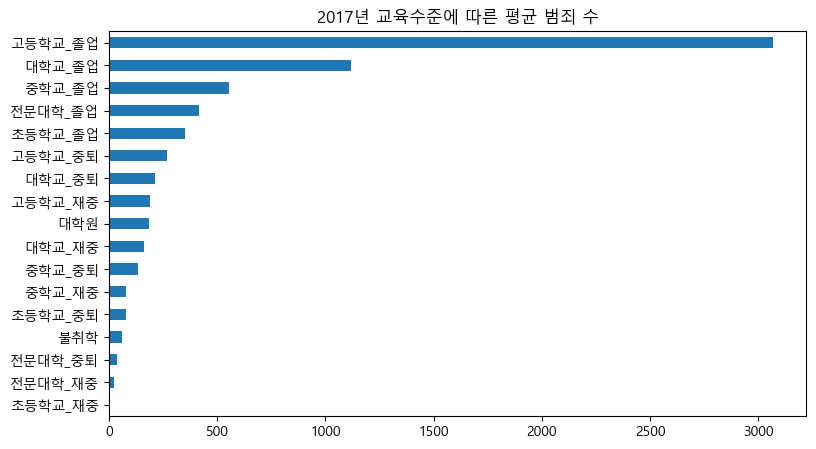

In [7]:
# 그래프의 크기 조정
plt.figure(figsize=(9,5))

# 평균 범죄 수 가로 막대그래프
# invert_yaxis() : y축 reverse
df17.mean().sort_values(ascending=False).plot.barh().invert_yaxis()

# 타이틀 지정
plt.title("2017년 교육수준에 따른 평균 범죄 수")

plt.show()

▷ 2017년도에는 고등학교 졸업한 사람의 범죄 건수 평균이 제일 크다.

▷ 그 다음으로 대학교졸업, 중학교졸업, 전문대학졸업 순이다.

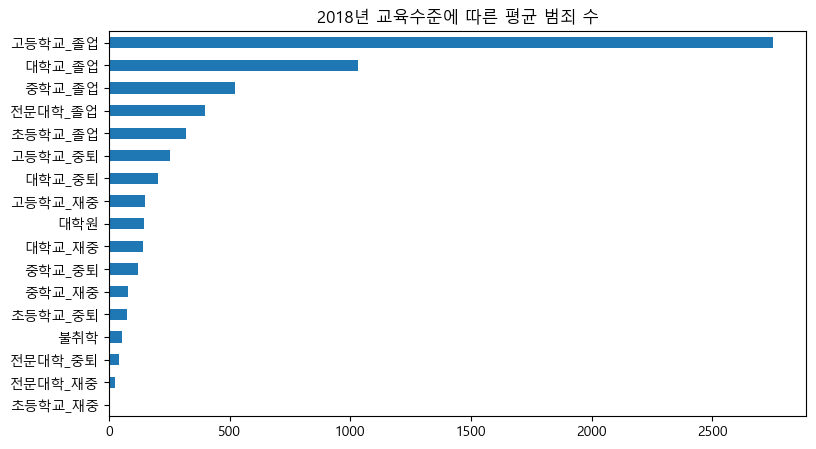

In [8]:
# 그래프의 크기 조정
plt.figure(figsize=(9,5))

# 평균 범죄 수 가로 막대그래프
# invert_yaxis() : y축 reverse
df18.mean().sort_values(ascending=False).plot.barh().invert_yaxis()

# 타이틀 지정
plt.title("2018년 교육수준에 따른 평균 범죄 수")

plt.show()

▷ 2018년도에는 고등학교 졸업한 사람의 범죄 건수 평균이 제일 크다.

▷ 그 다음으로 대학교졸업, 중학교졸업, 전문대학졸업 순이다.

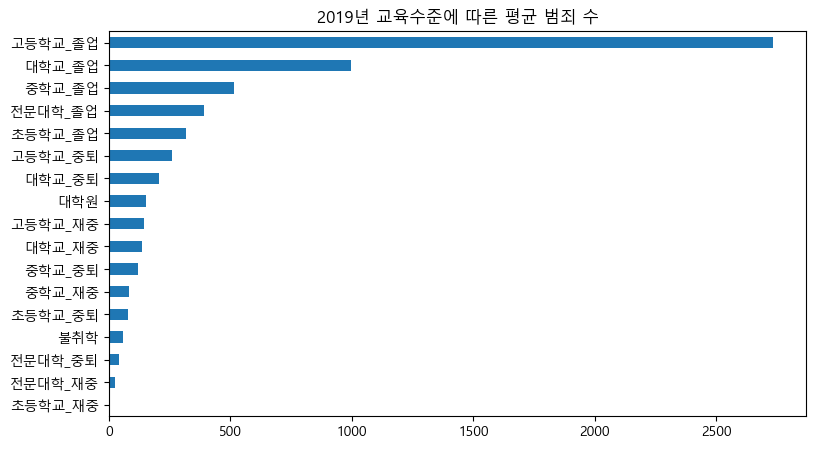

In [9]:
# 그래프의 크기 조정
plt.figure(figsize=(9,5))

# 평균 범죄 수 가로 막대그래프
# invert_yaxis() : y축 reverse
df19.mean().sort_values(ascending=False).plot.barh().invert_yaxis()

# 타이틀 지정
plt.title("2019년 교육수준에 따른 평균 범죄 수")

plt.show()

▷ 2019년도에는 고등학교 졸업한 사람의 범죄 건수 평균이 제일 크다.

▷ 그 다음으로 대학교졸업, 중학교졸업, 전문대학졸업 순이다.

### [ 연도별 교육수준에 따른  범죄종류의 최대값 ]

* 2017년도 교육수준에 따른 범죄종류별 최대값 

In [10]:
dict17 = dict(df17.max())
dict17

{'불취학': 2186,
 '초등학교_재중': 58,
 '초등학교_중퇴': 2436,
 '초등학교_졸업': 7061,
 '중학교_재중': 6162,
 '중학교_중퇴': 2900,
 '중학교_졸업': 10155,
 '고등학교_재중': 8394,
 '고등학교_중퇴': 5821,
 '고등학교_졸업': 76653,
 '전문대학_재중': 565,
 '전문대학_중퇴': 864,
 '전문대학_졸업': 13790,
 '대학교_재중': 3202,
 '대학교_중퇴': 4847,
 '대학교_졸업': 38826,
 '대학원': 4221}

In [24]:
# 위에서 '불취학'= 2186 인 범죄 분류 찾기
df17[df17["불취학"] == dict17["불취학"]]

,불취학,초등학교_재중,초등학교_중퇴,초등학교_졸업,중학교_재중,중학교_중퇴,중학교_졸업,고등학교_재중,고등학교_중퇴,고등학교_졸업,전문대학_재중,전문대학_중퇴,전문대학_졸업,대학교_재중,대학교_중퇴,대학교_졸업,대학원
범죄분류,,,,,,,,,,,,,,,,,
절도,2186,58,2436,7061,6162,2900,7837,8394,5436,29285,491,565,3643,2858,2242,8483,1438


In [26]:
# 위에서 인덱스만 가져오기
df17[df17["불취학"] == dict17["불취학"]].index[0]

'절도'

In [12]:
# for문을 사용해 딕셔너리에 있는 모든 값에 적용
max17 = []
for i in dict17.keys():
    max17.append(df17[df17[i] == dict17[i]].index[0])

In [39]:
pd.DataFrame(max17, index = list(dict17.keys()), columns = ["2017"])

,2017
불취학,절도
초등학교_재중,절도
초등학교_중퇴,절도
초등학교_졸업,절도
중학교_재중,절도
중학교_중퇴,절도
중학교_졸업,폭행
고등학교_재중,절도
고등학교_중퇴,사기
고등학교_졸업,도로교통법(음주운전)


* 2018년도 교육수준에 따른 범죄종류별 최대값

In [14]:
dict18 = dict(df18.max())
dict18

{'불취학': 2203,
 '초등학교_재중': 38,
 '초등학교_중퇴': 2488,
 '초등학교_졸업': 6850,
 '중학교_재중': 5758,
 '중학교_중퇴': 2655,
 '중학교_졸업': 10128,
 '고등학교_재중': 6124,
 '고등학교_중퇴': 6582,
 '고등학교_졸업': 59256,
 '전문대학_재중': 624,
 '전문대학_중퇴': 1233,
 '전문대학_졸업': 11538,
 '대학교_재중': 2930,
 '대학교_중퇴': 5484,
 '대학교_졸업': 31138,
 '대학원': 3050}

In [15]:
max18 = []
for i in dict18.keys():
    max18.append(df18[df18[i] == dict18[i]].index[0])

In [40]:
pd.DataFrame(max18, index = list(dict18.keys()), columns = ["2018"])

,2018
불취학,절도
초등학교_재중,절도
초등학교_중퇴,절도
초등학교_졸업,절도
중학교_재중,절도
중학교_중퇴,절도
중학교_졸업,폭행
고등학교_재중,절도
고등학교_중퇴,사기
고등학교_졸업,도로교통법(음주운전)


* 2019년도 교육수준에 따른 범죄종류별 최대값

In [17]:
dict19 = dict(df19.max())
dict19

{'불취학': 2529,
 '초등학교_재중': 29,
 '초등학교_중퇴': 2781,
 '초등학교_졸업': 7601,
 '중학교_재중': 6132,
 '중학교_중퇴': 2687,
 '중학교_졸업': 10329,
 '고등학교_재중': 6057,
 '고등학교_중퇴': 7283,
 '고등학교_졸업': 63215,
 '전문대학_재중': 590,
 '전문대학_중퇴': 1251,
 '전문대학_졸업': 8970,
 '대학교_재중': 2703,
 '대학교_중퇴': 6115,
 '대학교_졸업': 22896,
 '대학원': 2772}

In [18]:
max19 = []
for i in dict19.keys():
    max19.append(df19[df19[i] == dict19[i]].index[0])

In [41]:
pd.DataFrame(max19, index = list(dict19.keys()), columns = ["2019"])

,2019
불취학,절도
초등학교_재중,절도
초등학교_중퇴,절도
초등학교_졸업,절도
중학교_재중,절도
중학교_중퇴,절도
중학교_졸업,폭행
고등학교_재중,절도
고등학교_중퇴,사기
고등학교_졸업,사기


In [44]:
# 리스트 max17을 데이터프레임으로 만든 후 리스트 max18와 max19를 추가
maxdf = pd.DataFrame(max17, index = list(dict19.keys()), columns = ["2017"])
maxdf["2018"] = max18
maxdf["2019"] = max19

maxdf

,2017,2018,2019
불취학,절도,절도,절도
초등학교_재중,절도,절도,절도
초등학교_중퇴,절도,절도,절도
초등학교_졸업,절도,절도,절도
중학교_재중,절도,절도,절도
중학교_중퇴,절도,절도,절도
중학교_졸업,폭행,폭행,폭행
고등학교_재중,절도,절도,절도
고등학교_중퇴,사기,사기,사기
고등학교_졸업,도로교통법(음주운전),도로교통법(음주운전),사기


▷ 절도, 폭행, 사기, 음주운전이 최대값으로 나타난다.

▷ 2017, 2018, 2019년에서 교육수준이 중학교 중퇴 이전인 경우 절도가 최대값으로 나타난다.

▷ 2017, 2018년에서 고등학교 졸업 이후인 경우 음주운전이 많은 부분을 차지했다.

▷ 그에 비해 2019년도 고등학교 졸업 이후에는 사기가 많은 부분을 차지했다.

### [ 교육 수준이 낮을 수록 살인을 저지르는 횟수가 많은가? ]

In [21]:
# 범죄분류가 '살인'인 인덱스를 가지는 행만 추출
m_df17 = df17.iloc[6]
m_df18 = df18.iloc[6]
m_df19 = df19.iloc[6]

In [52]:
# 시리즈 합치기
# concat() 메서드
# axis=1 : 가로로 합침

seri_concat = pd.concat([m_df17, m_df18, m_df19], axis=1)
seri_concat.columns = ["2017", "2018", "2019"]
seri_concat    # Type --> DataFrame

,2017,2018,2019
불취학,14,16,15
초등학교_재중,0,0,0
초등학교_중퇴,29,21,16
초등학교_졸업,74,57,71
중학교_재중,1,0,4
중학교_중퇴,42,31,31
중학교_졸업,92,87,85
고등학교_재중,11,4,6
고등학교_중퇴,59,38,45
고등학교_졸업,272,273,253


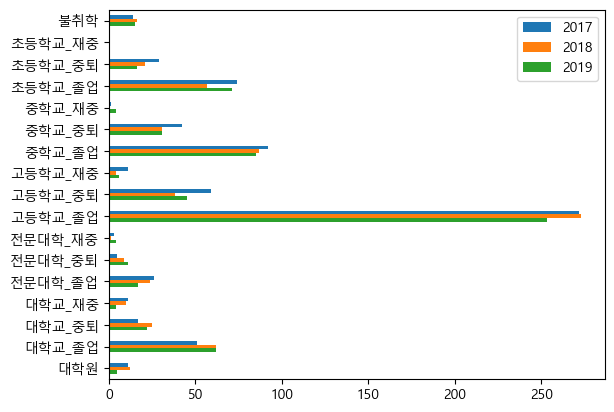

In [23]:
# 막대그래프
# invert_yaxis() : y축 reverse
seri_concat.plot.barh().invert_yaxis()

# 막대별 인덱스
plt.legend(seri_concat.columns)

plt.show()

▷ 교육수준이 낮을 수록 살인 횟수가 많을 것이라는 예상과는 달리 고등학교 졸업의 학력을 가진 사람들의 살인 횟수가 가장 많은 것으로 나타났다.

▷ 한국의 고학력화 현상과 더불어 범죄자의 교육수준도 높아진 것으로 보인다.